In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import feature_selection
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import ListedColormap
import pylab
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

dataset=pd.read_csv("D:/datasets/retinopathy.csv")
print(dataset.describe())

le=preprocessing.LabelEncoder()
dataset["Class"]=le.fit_transform(dataset["Class"])
X = dataset.iloc[:, 0:5]
y = dataset.iloc[:, 5]

         Contrast  Haemorrhage     Exudates      Labels    Bloodvessel
count  400.000000     400.0000   400.000000  400.000000     400.000000
mean    29.662500    1361.8125   509.572500    3.475635  169122.507500
std     13.666034    1185.0830   422.922248    1.851438   94715.928305
min      3.000000      51.0000    21.000000    0.728600   36700.000000
25%     18.000000     699.2500   275.000000    2.112650   92100.000000
50%     27.000000    1025.0000   402.500000    3.021200  137500.000000
75%     40.250000    1618.2500   605.000000    4.763800  227750.000000
max     52.000000   12203.0000  3701.000000   10.950600  500001.000000


In [54]:
print(X.head(1))
fvalues,probs=feature_selection.f_classif(X,y)
## gives a statistical test
for cols,f,p in zip(X.columns,fvalues,probs):
    print(cols,"fvalue:",f,"p:",p)

   Contrast  Haemorrhage  Exudates  Labels  Bloodvessel
0        41          322       126  8.3252       452600
Contrast fvalue: 67.20061046812745 p: 3.818251915040771e-35
Haemorrhage fvalue: 15.475372397891872 p: 1.5426689847545213e-09
Exudates fvalue: 11.468260882818928 p: 3.1697105328779656e-07
Labels fvalue: 57.22323873245292 p: 9.486291062391919e-31
Bloodvessel fvalue: 53.01664871835814 p: 7.921353030067902e-29


In [55]:
X_1, X_test, y_1, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, random_state=0, test_size=0.20)

In [56]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_cv = sc_X.transform(X_cv)
X_test = sc_X.transform(X_test)

In [57]:
y_train_accuracy=[]
y_cv_accuracy=[]
alp=[0.01,0.1,1,2,3,4,5,6,7,9,10]#values for C(regularization variable)
for i in tqdm(alp):
    svm=SVC(C=i,kernel='rbf',class_weight="balanced")
    svm.fit(X_train,y_train)
    y_train_pred=svm.predict(X_train)
    y_cv_pred=svm.predict(X_cv)
    y_train_accuracy.append(metrics.accuracy_score(y_train,y_train_pred))
    y_cv_accuracy.append(metrics.accuracy_score(y_cv,y_cv_pred))

100%|██████████| 11/11 [00:00<00:00, 80.92it/s]


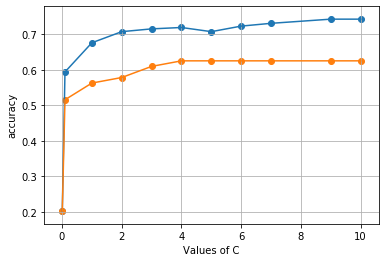

In [58]:
plt.plot(alp,y_train_accuracy)
plt.plot(alp,y_cv_accuracy)
plt.scatter(alp,y_train_accuracy)
plt.scatter(alp,y_cv_accuracy)
plt.ylabel('accuracy')
plt.xlabel('Values of C')
plt.grid()
plt.show()

In [59]:
best_c=5
svm=SVC(C=best_c,kernel='rbf',class_weight="balanced")
svm.fit(X_train,y_train)
y_test_pred_SVM=svm.predict(X_test)
y_train_pred_SVM=svm.predict(X_train)
print(y_test_pred_SVM)

[0 3 2 3 2 1 2 2 0 1 3 0 0 3 3 1 1 0 0 2 2 2 0 1 2 1 3 3 1 1 0 2 1 2 3 3 3
 0 2 1 0 1 3 0 1 3 1 2 1 2 1 0 1 0 1 1 1 3 3 3 1 1 2 3 0 1 0 2 0 1 3 2 3 3
 2 3 1 1 1 1]


In [60]:
cm = metrics.confusion_matrix(y_test, y_test_pred_SVM)
print (cm)
acc_sc_SVM_train=metrics.accuracy_score(y_train, y_train_pred_SVM)
acc_sc_SVM_test=metrics.accuracy_score(y_test, y_test_pred_SVM)
SVM_acc=[acc_sc_SVM_train,acc_sc_SVM_test]
print(SVM_acc)
SVM_prec=metrics.precision_score(y_test, y_test_pred_SVM,average=None)
print(SVM_prec)

[[12  2  4  0]
 [ 0 13  1  3]
 [ 2  7  9  1]
 [ 2  5  3 16]]
[0.70703125, 0.625]
[0.75       0.48148148 0.52941176 0.8       ]


In [61]:
from sklearn.linear_model import LogisticRegression
y_train_accuracy=[]
y_cv_accuracy=[]
alp=[0.01,0.1,1,2,3,4,5,6,7,9,10]#values for C(regularization variable)
for i in tqdm(alp):
    lr=LogisticRegression(C=i)
    lr.fit(X_train,y_train)
    y_train_pred=lr.predict(X_train)
    y_cv_pred=lr.predict(X_cv)
    y_train_accuracy.append(metrics.accuracy_score(y_train,y_train_pred))
    y_cv_accuracy.append(metrics.accuracy_score(y_cv,y_cv_pred))


100%|██████████| 11/11 [00:00<00:00, 28.62it/s]


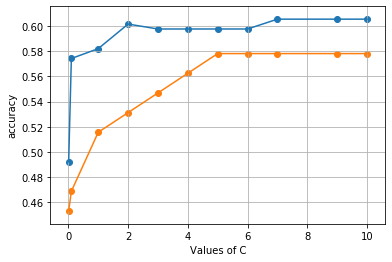

In [62]:
plt.plot(alp,y_train_accuracy)
plt.plot(alp,y_cv_accuracy)
plt.scatter(alp,y_train_accuracy)
plt.scatter(alp,y_cv_accuracy)
plt.ylabel('accuracy')
plt.xlabel('Values of C')
plt.grid()
plt.show()

In [63]:
best_c=5
lr=LogisticRegression(C=best_c)
lr.fit(X_train,y_train)
y_test_pred_lr=lr.predict(X_test)
y_train_pred_lr=lr.predict(X_train)
print(y_test_pred_lr)

[2 3 1 3 2 1 2 0 0 1 3 2 0 3 3 1 1 0 2 0 2 2 2 1 0 1 3 3 3 2 2 3 1 2 3 3 3
 0 2 1 0 1 3 2 1 3 1 2 2 2 2 2 1 2 1 1 3 3 1 3 1 2 3 3 2 2 0 3 3 1 3 1 3 3
 2 3 1 1 0 1]


In [64]:
cm = metrics.confusion_matrix(y_test, y_test_pred_lr)
print (cm)
acc_sc_LR_train=metrics.accuracy_score(y_train, y_train_pred_lr)
acc_sc_LR_test=metrics.accuracy_score(y_test, y_test_pred_lr)
LR_acc=[acc_sc_LR_train,acc_sc_LR_test]
print(LR_acc)
LR_prec=metrics.precision_score(y_test, y_test_pred_lr,average=None)
print(LR_prec)

[[ 7  1 10  0]
 [ 1 11  1  4]
 [ 2  6  9  2]
 [ 0  4  3 19]]
[0.59765625, 0.575]
[0.7        0.5        0.39130435 0.76      ]


In [65]:
from sklearn.neighbors import KNeighborsClassifier
K = [] 
training = [] 
cv = []
scores = {} 
for k in range(2,40): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train)   
    training_score = clf.score(X_train, y_train) 
    cv_score=clf.score(X_cv,y_cv)
    K.append(k)   
    training.append(training_score) 
    cv.append(cv_score)
    scores[k] = [training_score, cv_score]
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.81640625, 0.53125]
3 : [0.765625, 0.53125]
4 : [0.7421875, 0.46875]
5 : [0.73828125, 0.515625]
6 : [0.71484375, 0.484375]
7 : [0.703125, 0.546875]
8 : [0.703125, 0.546875]
9 : [0.703125, 0.5625]
10 : [0.68359375, 0.515625]
11 : [0.6875, 0.5625]
12 : [0.67578125, 0.5625]
13 : [0.65625, 0.53125]
14 : [0.640625, 0.53125]
15 : [0.63671875, 0.515625]
16 : [0.64453125, 0.515625]
17 : [0.6328125, 0.515625]
18 : [0.625, 0.5]
19 : [0.6328125, 0.515625]
20 : [0.62109375, 0.515625]
21 : [0.625, 0.5]
22 : [0.6328125, 0.515625]
23 : [0.62890625, 0.484375]
24 : [0.62109375, 0.484375]
25 : [0.62890625, 0.5]
26 : [0.6171875, 0.46875]
27 : [0.62890625, 0.5]
28 : [0.6171875, 0.484375]
29 : [0.609375, 0.5]
30 : [0.62109375, 0.5]
31 : [0.6171875, 0.515625]
32 : [0.6171875, 0.515625]
33 : [0.61328125, 0.515625]
34 : [0.60546875, 0.515625]
35 : [0.61328125, 0.515625]
36 : [0.60546875, 0.53125]
37 : [0.609375, 0.515625]
38 : [0.59765625, 0.53125]
39 : [0.609375, 0.515625]


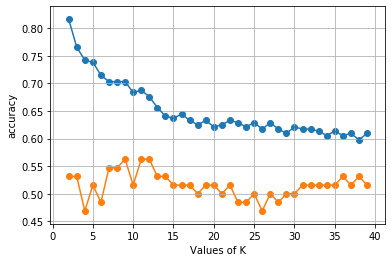

In [66]:
plt.plot(K,training)
plt.plot(K,cv)
plt.scatter(K,training)
plt.scatter(K,cv)
plt.ylabel('accuracy')
plt.xlabel('Values of K')
plt.grid()
plt.show()

In [67]:
best_k=36
clf = KNeighborsClassifier(n_neighbors = best_k) 
clf.fit(X_train, y_train)
y_train_pred_KNN=clf.predict(X_train)
y_test_pred_KNN=clf.predict(X_test)
print(y_test_pred_KNN)

[0 3 2 3 2 1 2 0 0 2 3 0 0 1 3 3 1 0 0 0 0 2 0 1 0 1 2 3 1 2 0 2 1 2 3 1 3
 0 2 1 0 1 3 0 1 3 2 2 2 1 1 0 1 0 1 1 1 3 3 3 1 1 3 3 0 1 0 3 0 3 3 2 3 3
 2 3 1 1 1 3]


In [68]:
cm = metrics.confusion_matrix(y_test, y_test_pred_KNN)
print (cm)
acc_sc_KNN_train=metrics.accuracy_score(y_train, y_train_pred_KNN)
acc_sc_KNN_test=metrics.accuracy_score(y_test, y_test_pred_KNN)
KNN_acc=[acc_sc_KNN_train,acc_sc_KNN_test]
print(KNN_acc)
KNN_prec=metrics.precision_score(y_test, y_test_pred_KNN,average=None)
print(KNN_prec)

[[14  0  4  0]
 [ 0 12  1  4]
 [ 4  7  7  1]
 [ 2  4  3 17]]
[0.60546875, 0.625]
[0.7        0.52173913 0.46666667 0.77272727]


In [69]:
from sklearn import naive_bayes
gnb=naive_bayes.GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
y_train_pred_NB=gnb.predict(X_train)
y_test_pred_NB=gnb.predict(X_test)
print(y_test_pred_NB)

[0 1 1 3 2 3 2 2 2 3 1 0 2 3 3 1 1 2 0 0 0 1 2 1 0 1 3 3 2 2 2 2 1 3 1 1 3
 0 2 1 0 1 3 0 3 1 1 1 2 2 1 2 3 2 2 1 3 3 1 3 1 1 3 3 0 1 0 3 2 1 3 1 3 3
 2 3 1 1 1 1]


In [71]:
cm = metrics.confusion_matrix(y_test, y_test_pred_KNN)
print (cm)
acc_sc_NB_train=metrics.accuracy_score(y_train, y_train_pred_NB)
acc_sc_NB_test=metrics.accuracy_score(y_test, y_test_pred_NB)
NB_acc=[acc_sc_NB_train,acc_sc_NB_test]
print(NB_acc)
NB_prec=metrics.precision_score(y_test, y_test_pred_NB,average=None)
print(NB_prec)

[[14  0  4  0]
 [ 0 12  1  4]
 [ 4  7  7  1]
 [ 2  4  3 17]]
[0.51171875, 0.4875]
[0.63636364 0.46428571 0.21052632 0.68181818]


In [72]:
acc_sc_models=[SVM_acc,LR_acc,KNN_acc,NB_acc]
print(acc_sc_models)
prec_sc_models=[SVM_prec[-1],LR_prec[-1],KNN_prec[-1],NB_prec[-1]]
list=[SVM_prec,LR_prec,KNN_prec,NB_prec]
for i in list:
    print(i)
print(prec_sc_models)

[[0.70703125, 0.625], [0.59765625, 0.575], [0.60546875, 0.625], [0.51171875, 0.4875]]
[0.75       0.48148148 0.52941176 0.8       ]
[0.7        0.5        0.39130435 0.76      ]
[0.7        0.52173913 0.46666667 0.77272727]
[0.63636364 0.46428571 0.21052632 0.68181818]
[0.8, 0.76, 0.7727272727272727, 0.6818181818181818]


In [75]:
print(svm.predict([[41,322,126,8.3252,452600],
[21,2401,1138,8.3014,358500],
[52,496,177,7.2574,352100],
[52,558,219,5.6431,341300],
[52,565,259,3.8462,342200]]))

[2 2 2 2 2]
